In [1]:
import numpy as np
import scipy.optimize as sco
import matplotlib as mpl
import matplotlib.pyplot as plt
import sl_py_tools.matplotlib_tricks as mpt


In [2]:
from complex_synapse.shorten import uniform, uni_star, num_star, Y_STAR, A_STAR, limits, alpha_to_s, envelope, envelopes, env_ravel

In [3]:
Y_STAR, (A_STAR * np.sqrt(2))

(1.5055344160215383, 0.5420285775618272)

In [4]:
(2 * Y_STAR**2), 1 / (2 * Y_STAR**2), (2 * np.sinh(Y_STAR / 2)**2), 1 / (2 * np.sinh(Y_STAR / 2)**2)

(4.533267755650629,
 0.22059142629585904,
 1.3642300206961724,
 0.7330142166859044)

In [5]:
x = .7
uniform(x, num_star(x)), uni_star(x), Y_STAR - np.tanh(Y_STAR/2) * np.cosh(Y_STAR)

(2.1264996455533214, 2.1264996455533214, 6.661338147750939e-16)

In [6]:
np.r_[1 / alpha_to_s(np.array(limits(4, True))), 1 / alpha_to_s(np.array(limits(6, True)))]

converged 0.9999999999999964
converged 6.661338147750939e-16
converged 1.0
converged 3.9057646006313007e-13


array([1.28077641, 2.73205081, 3.56155281, 8.75795774])

In [7]:
s, a, env = envelopes(10, 50)
s_env, a_env = env_ravel(s, env)
appx = A_STAR * np.sqrt(2 / s_env)

In [8]:
mpt.rc_fonts()

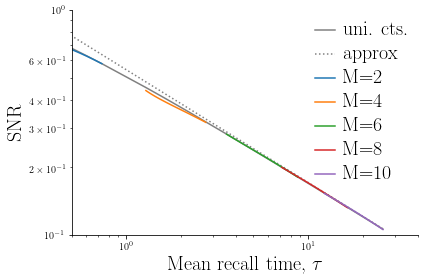

In [9]:
fig1, ax = plt.subplots()
ax.loglog(1 / s_env, s_env * a_env, label="uni. cts.", color='grey')
ax.loglog(1 / s_env, s_env * appx, ':', label="approx", color='grey')
for num, ss, aa in zip(range(2, 12, 2), s, a):
    # env = np.interp(ss, s_env, a_env)
    ax.loglog(1 / ss, aa * ss, label=f"M={num}")
plt.legend(loc=1)
ax.set_xlim(0.5, 40)
ax.set_ylim(0.1, 1)
ax.set_xlabel("Mean recall time, $\\tau$")
ax.set_ylabel("SNR")
mpt.clean_axes(ax)


In [10]:
limits(4), limits(6)

((0.3072891789040808, 0.43542054468233893),
 (0.48053381618427743, 0.6228558677424063))

In [11]:
lims = (limits(4)[1], limits(6)[0])
s_gap, a_gap, env_gap = envelope(4, 20, lims=lims)

In [15]:
limits(2), limits(4)

((0.01, 0.22189867593154336), (0.3072891789040808, 0.43542054468233893))

In [16]:
lims = (limits(2)[1], limits(4)[0])
s2_gap, a2_gap, env2_gap = envelope(2, 20, lims=lims)

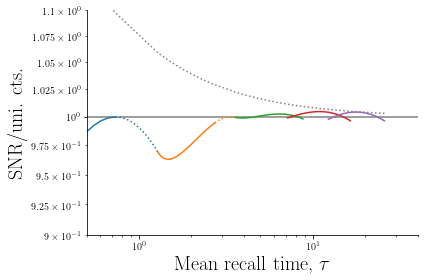

In [19]:
fig2, ax = plt.subplots()
ax.loglog(1 / s_env, appx / a_env, ':', label="approx", color='grey')
ax.loglog([0.5, 40], [1, 1], color='grey')
for num, ss, aa, ee in zip(range(2, 12, 2), s, a, env):
    ax.loglog(1 / ss, aa /ee, label=f"M={num}")
ax.loglog(1 / s_gap, a_gap / env_gap, ':', color='C1')
ax.loglog(1 / s2_gap, a2_gap / env2_gap, ':', color='C0')
ax.set_xlim(0.5, 40)
ax.set_ylim(0.9, 1.1)
ax.set_xlabel("Mean recall time, $\\tau$")
ax.set_ylabel("SNR/uni. cts.")
mpt.clean_axes(ax)

In [13]:
fig1.savefig('../../Notes/Figures/shorten_opt.pdf')

In [20]:
fig2.savefig('../../Notes/Figures/shorten_ratio.pdf')